In [ ]:
import numpy as np
import pandas as pd
import joblib
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
SAVE_PATH = "/content/drive/MyDrive/PBL2_files"

In [ ]:
from tensorflow.keras.losses import MeanSquaredError
lstm_model = load_model(
    f"/content/drive/MyDrive/PBL2_filestrained_lstm_model.h5",
    custom_objects={"mse": MeanSquaredError}
)
rf_model = joblib.load(f"/content/drive/MyDrive/PBL2_filestrained_rf_model.pkl")
scaler_lstm = joblib.load(f"/content/drive/MyDrive/PBL2_filesscaler_lstm.pkl")
scaler_rf = joblib.load(f"/content/drive/MyDrive/PBL2_filesscaler_rf.pkl")


In [ ]:
pollutants = ['Ozone', 'SO2', 'NO2', 'PM10', 'PM2.5']
user_input = []

print("📥 Enter pollutant values for 3 consecutive days:")
for day in range(3):
    day_data = []
    print(f"\nDay {day + 1}:")
    for pollutant in pollutants:
        val = float(input(f"  {pollutant}: "))
        day_data.append(val)
    user_input.append(day_data)

user_input = np.array(user_input).reshape(1, 3, 5)
scaled_input = scaler_lstm.transform(user_input[0])
scaled_input = scaled_input.reshape(1, 3, 5)

📥 Enter pollutant values for 3 consecutive days:

Day 1:
  Ozone: 30.5
  SO2: 18
  NO2: 40
  PM10: 120
  PM2.5: 85

Day 2:
  Ozone: 35.2
  SO2: 22
  NO2: 38
  PM10: 125
  PM2.5: 82

Day 3:
  Ozone: 33.7
  SO2: 20
  NO2: 36
  PM10: 128
  PM2.5: 79


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
future_scaled = lstm_model.predict(scaled_input)
future_unscaled = scaler_lstm.inverse_transform(future_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


In [ ]:
rf_input = scaler_rf.transform(future_unscaled)
health_score = rf_model.predict(rf_input)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print("\n📊 Predicted Pollutants for Next Day:")
for i, pol in enumerate(pollutants):
    print(f"{pol}: {future_unscaled[0][i]:.2f}")

print(f"\n Predicted Health Impact Score: {health_score[0]:.2f}")


📊 Predicted Pollutants for Next Day:
Ozone: 33.54
SO2: 19.04
NO2: 36.97
PM10: 129.24
PM2.5: 74.55

 Predicted Health Impact Score: 71.33


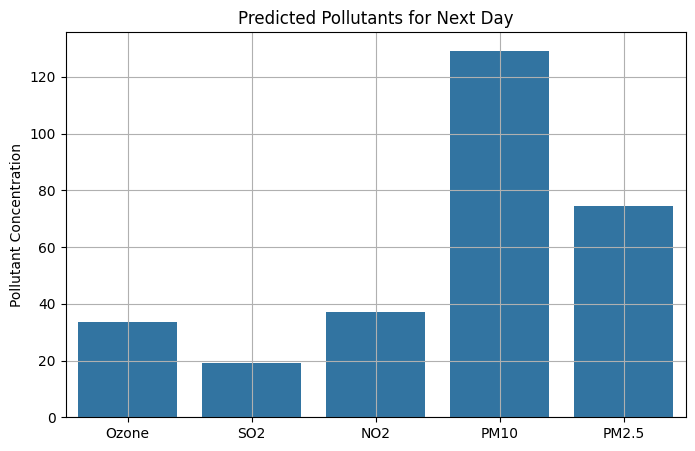

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=pollutants, y=future_unscaled[0])
plt.title("Predicted Pollutants for Next Day")
plt.ylabel("Pollutant Concentration")
plt.grid(True)
plt.show()

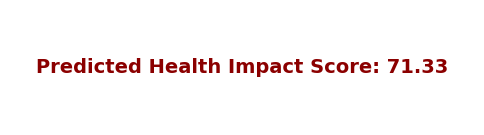

In [ ]:
plt.figure(figsize=(6, 1.5
                    ))
plt.text(0.5, 0.5, f'Predicted Health Impact Score: {health_score[0]:.2f}',
         fontsize=14, ha='center', va='center', color='darkred', fontweight='bold')
plt.axis('off')
plt.show()

In [ ]:
########